In [1]:
import numpy as np

class LogisticRegressionCustom:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        # Initialize weights and bias
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        # Gradient Descent
        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(linear_model)
            dw = (1 / num_samples) * np.dot(X.T, (predictions - y))
            db = (1 / num_samples) * np.sum(predictions - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(linear_model)
        binary_predictions = np.where(predictions >= 0.5, 1, 0)

        return binary_predictions


In [2]:
import numpy as np

class KNearestNeighborCustom:
    def __init__(self, k=3):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = []
        for x_test in X_test:
            distances = np.linalg.norm(self.X_train - x_test, axis=1)
            nearest_neighbors_indices = np.argsort(distances)[:self.k]
            nearest_labels = self.y_train[nearest_neighbors_indices]
            predicted_label = np.bincount(nearest_labels).argmax()
            predictions.append(predicted_label)
        return np.array(predictions)

In [3]:
import numpy as np

class DecisionTreeCustom:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    def predict(self, X, sample_weights=None):
        return np.array([self.traverse_tree(x, self.tree, sample_weights) for x in X])

    def traverse_tree(self, x, node, sample_weights=None):
        if 'class' in node:
            return node['class']

        feature_value = x[node['feature_index']]
        threshold = node['threshold']

        if feature_value < threshold:
            return self.traverse_tree(x, node['left'], sample_weights)
        else:
            return self.traverse_tree(x, node['right'], sample_weights)

    def fit(self, X, y, sample_weights=None):
        self.tree = self.build_tree(X, y, depth=self.max_depth, sample_weights=sample_weights)

    def build_tree(self, X, y, depth, sample_weights=None):
        num_samples, num_features = X.shape
        unique_classes = np.unique(y)
        if sample_weights is not None:
            sample_weights = np.ones(num_samples) / num_samples

        # If all samples have the same class or maximum depth is reached, create a leaf node
        if len(unique_classes) == 1 or depth == 0:
            return {'class': unique_classes[0]}

        # Choose the best split based on a criterion 
        best_split = self.find_best_split(X, y, sample_weights)

        if best_split is None:
            return {'class': np.bincount(y, weights=sample_weights).argmax()}

        best_feature_index, best_threshold = best_split

        mask = X[:, best_feature_index] < best_threshold
        X_left, y_left = X[mask], y[mask]
        X_right, y_right = X[~mask], y[~mask]

        left_subtree = self.build_tree(X_left, y_left, depth - 1, sample_weights)
        right_subtree = self.build_tree(X_right, y_right, depth - 1, sample_weights)

        return {
            'feature_index': best_feature_index,
            'threshold': best_threshold,
            'left': left_subtree,
            'right': right_subtree
        }

    def find_best_split(self, X, y, sample_weights=None):
        num_samples, num_features = X.shape
        unique_classes = np.unique(y)

        best_gini = float('inf')
        best_split = None

        for feature_index in range(num_features):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                mask = X[:, feature_index] < threshold
                y_left, y_right = y[mask], y[~mask]
                
                # if sample_weights is not None:
                #     if len(sample_weights) != len(mask):
                #         print(len(X))
                #         print(len(sample_weights))
                #         print(len(mask))

                if sample_weights is not None:
                    weight_left, weight_right = sample_weights[mask], sample_weights[~mask]
                    gini = self.calculate_weighted_gini(y_left, y_right, weight_left, weight_right)
                else:
                    gini = self.calculate_gini(y_left, y_right)

                if gini < best_gini:
                    best_gini = gini
                    best_split = (feature_index, threshold)

        return best_split

    def calculate_gini(self, y_left, y_right):
        size_left, size_right = len(y_left), len(y_right)
        size_total = size_left + size_right

        gini_left = 1.0 - sum((np.sum(y_left == c) / size_left) ** 2 for c in np.unique(y_left))
        gini_right = 1.0 - sum((np.sum(y_right == c) / size_right) ** 2 for c in np.unique(y_right))

        gini = (size_left / size_total) * gini_left + (size_right / size_total) * gini_right
        return gini

    def calculate_weighted_gini(self, y_left, y_right, weight_left, weight_right):
        size_left, size_right = len(y_left), len(y_right)
        size_total = size_left + size_right

        gini_left = 1.0 - sum((np.sum(y_left == c) / size_left) ** 2 * w for c, w in zip(np.unique(y_left), weight_left))
        gini_right = 1.0 - sum((np.sum(y_right == c) / size_right) ** 2 * w for c, w in zip(np.unique(y_right), weight_right))

        gini = (size_left / size_total) * gini_left + (size_right / size_total) * gini_right
        return gini


In [4]:
from sklearn.svm import SVC

class SVMCustom:
    def __init__(self, kernel='linear', C=1.0):
        self.model = SVC(kernel=kernel, C=C)

    def fit(self, X, y):
        self.model.fit(X, y)

    def predict(self, X):
        return self.model.predict(X)

In [5]:
import numpy as np

class RandomForestCustom:
    def __init__(self, n_estimators=10, max_depth=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y, sample_weights = None):
        for _ in range(self.n_estimators):
            tree = DecisionTreeCustom(max_depth=self.max_depth)
            indices = np.random.choice(len(X), size=len(X), replace=True)
            tree.fit(X[indices], y[indices])
            self.trees.append(tree)

    def predict(self, X):
        # Make predictions using each tree and take a majority vote
        predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=predictions)


In [6]:
import numpy as np

class BoostingCustom:
    def __init__(self, n_estimators=10, max_depth=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.models = []
        self.alphas = []

    def fit(self, X, y):
        num_samples = len(X)
        
        sample_weights = np.ones(num_samples) / num_samples 

        for _ in range(self.n_estimators):
            weak_model = DecisionTreeCustom(max_depth=self.max_depth)
            weak_model.fit(X, y, sample_weights)

            y_pred = weak_model.predict(X)

            error = np.sum(sample_weights * (y_pred != y)) / np.sum(sample_weights)
            alpha = 0.5 * np.log((1 - error) / error)

            sample_weights *= np.exp(-alpha * y * y_pred)
            sample_weights /= np.sum(sample_weights)  # Normalize weights

            self.models.append(weak_model)
            self.alphas.append(alpha)

    def predict(self, X):
        predictions = np.zeros(len(X))
        for model, alpha in zip(self.models, self.alphas):
            predictions += alpha * model.predict(X)

        return np.sign(predictions).astype(int)


In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC

file_path1 = 'project3_dataset1.txt'
data1 = pd.read_csv(file_path1, delimiter='\t', header=None)
X1 = data1.iloc[:, :-1].values
y1 = data1.iloc[:, -1].values

file_path2 = 'project3_dataset2.txt'
data2 = pd.read_csv(file_path2, delimiter='\t', header=None)
X2 = data2.iloc[:, 1:-1].values  
y2 = data2.iloc[:, -1].values

# Preprocess project_dataset1
scaler1 = StandardScaler()
X1_scaled = scaler1.fit_transform(X1)

# Preprocess project_dataset2
le = LabelEncoder()
X2[:, 3] = le.fit_transform(X2[:, 3])  
X2 = X2.astype(float)  
scaler2 = StandardScaler()
X2_scaled = scaler2.fit_transform(X2)

# Split datasets into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1_scaled, y1, test_size=0.2, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_scaled, y2, test_size=0.2, random_state=42)

print(X2_train.shape)
print(X2_test.shape)


(369, 8)
(93, 8)


Evaluating Logistic Regression on project_dataset1:
  Average Accuracy on project_dataset1: 0.9737
  Average Precision on project_dataset1: 0.9809
  Average Recall on project_dataset1: 0.9483
  Average F1 on project_dataset1: 0.9639
  Average AUC on project_dataset1: 0.9685

Evaluating KNN on project_dataset1:
  Average Accuracy on project_dataset1: 0.9667
  Average Precision on project_dataset1: 0.9827
  Average Recall on project_dataset1: 0.9297
  Average F1 on project_dataset1: 0.9535
  Average AUC on project_dataset1: 0.9592

Evaluating Decision Tree on project_dataset1:
  Average Accuracy on project_dataset1: 0.7964
  Average Precision on project_dataset1: 0.6443
  Average Recall on project_dataset1: 0.4853
  Average F1 on project_dataset1: 0.5356
  Average AUC on project_dataset1: 0.7343

Evaluating SVM on project_dataset1:
  Average Accuracy on project_dataset1: 0.9737
  Average Precision on project_dataset1: 0.9732
  Average Recall on project_dataset1: 0.9576
  Average F1 on pr

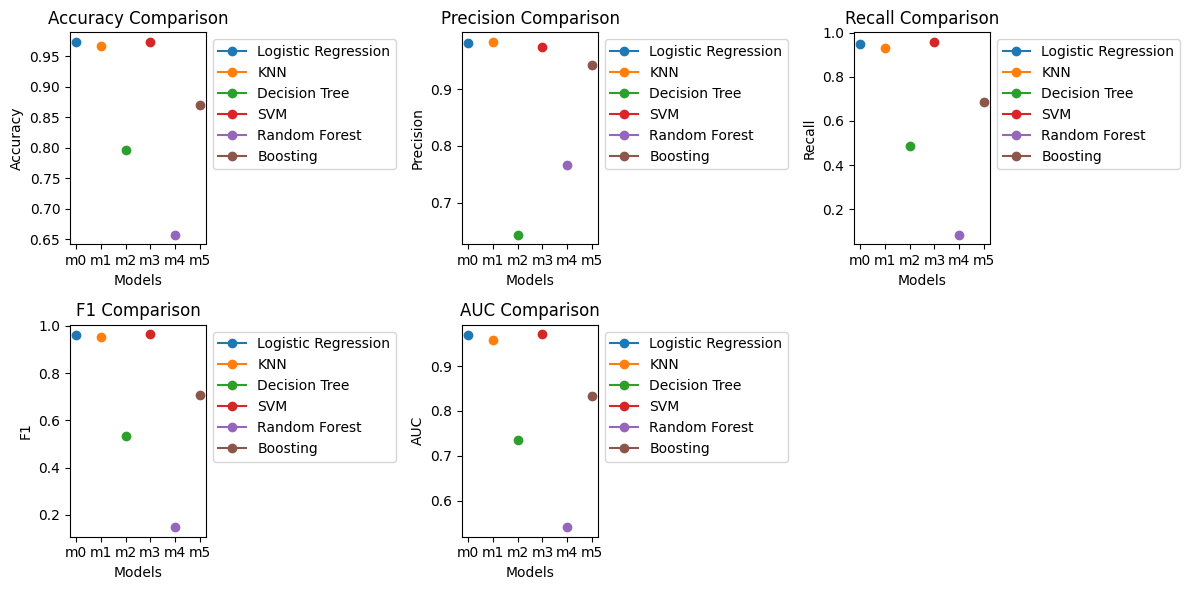

In [22]:
import numpy as np
from sklearn.exceptions import UndefinedMetricWarning
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore", category=UndefinedMetricWarning)


# Define models
logistic_regression_custom = LogisticRegressionCustom()
knn_custom = KNearestNeighborCustom(k=3)
decision_tree_custom = DecisionTreeCustom(max_depth=3)
svm_custom = SVMCustom()
random_forest_custom = RandomForestCustom(max_depth=3)
boosting_custom = BoostingCustom(max_depth=3)

models = {
    'Logistic Regression': logistic_regression_custom,
    'KNN': knn_custom,
    'Decision Tree': decision_tree_custom,
    'SVM': svm_custom,
    'Random Forest': random_forest_custom,
    'Boosting': boosting_custom
}

metrics = {
    'Accuracy': accuracy_score,
    'Precision': precision_score,
    'Recall': recall_score,
    'F1': f1_score,
    'AUC': roc_auc_score
}

# Initialize lists to store metric scores for each model
all_accuracy_scores = []
all_precision_scores = []
all_recall_scores = []
all_f1_scores = []
all_auc_scores = []

# Iterate through each model
for model_name, model in models.items():
    print(f"Evaluating {model_name} on project_dataset1:")
    
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    auc_scores = []

    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    # Iterate through each fold
    for train_index, test_index in skf.split(X1_scaled, y1):
        X_train, X_test = X1_scaled[train_index], X1_scaled[test_index]
        y_train, y_test = y1[train_index], y1[test_index] 

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy_scores.append(accuracy_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred))
        recall_scores.append(recall_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred))
        auc_scores.append(roc_auc_score(y_test, y_pred))

    print(f"  Average Accuracy on project_dataset1: {np.mean(accuracy_scores):.4f}")
    print(f"  Average Precision on project_dataset1: {np.mean(precision_scores):.4f}")
    print(f"  Average Recall on project_dataset1: {np.mean(recall_scores):.4f}")
    print(f"  Average F1 on project_dataset1: {np.mean(f1_scores):.4f}")
    print(f"  Average AUC on project_dataset1: {np.mean(auc_scores):.4f}")
    print()

    all_accuracy_scores.append(np.mean(accuracy_scores))
    all_precision_scores.append(np.mean(precision_scores))
    all_recall_scores.append(np.mean(recall_scores))
    all_f1_scores.append(np.mean(f1_scores))
    all_auc_scores.append(np.mean(auc_scores))

plt.figure(figsize=(12, 6))

models_names = list(models.keys())
metrics_names = list(metrics.keys())
metrics_values = [all_accuracy_scores, all_precision_scores, all_recall_scores, all_f1_scores, all_auc_scores]

for i, metric_values in enumerate(metrics_values):
    plt.subplot(2, 3, i+1)
    for j, model_name in enumerate(models_names):
        plt.plot('m' + str(j), metric_values[j], marker='o', label=model_name)

    plt.title(f'{metrics_names[i]} Comparison')
    plt.xlabel('Models')
    plt.ylabel(metrics_names[i])
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()



Evaluating Logistic Regression on project_dataset2:
  Average Accuracy on project_dataset2: 0.7358
  Average Precision on project_dataset2: 0.6526
  Average Recall on project_dataset2: 0.5500
  Average F1 on project_dataset2: 0.5830
  Average AUC on project_dataset2: 0.6923

Evaluating KNN on project_dataset2:
  Average Accuracy on project_dataset2: 0.6667
  Average Precision on project_dataset2: 0.5238
  Average Recall on project_dataset2: 0.4625
  Average F1 on project_dataset2: 0.4875
  Average AUC on project_dataset2: 0.6189

Evaluating Decision Tree on project_dataset2:
  Average Accuracy on project_dataset2: 0.6580
  Average Precision on project_dataset2: 0.2167
  Average Recall on project_dataset2: 0.0250
  Average F1 on project_dataset2: 0.0439
  Average AUC on project_dataset2: 0.5092

Evaluating SVM on project_dataset2:
  Average Accuracy on project_dataset2: 0.7164
  Average Precision on project_dataset2: 0.6134
  Average Recall on project_dataset2: 0.5125
  Average F1 on pr

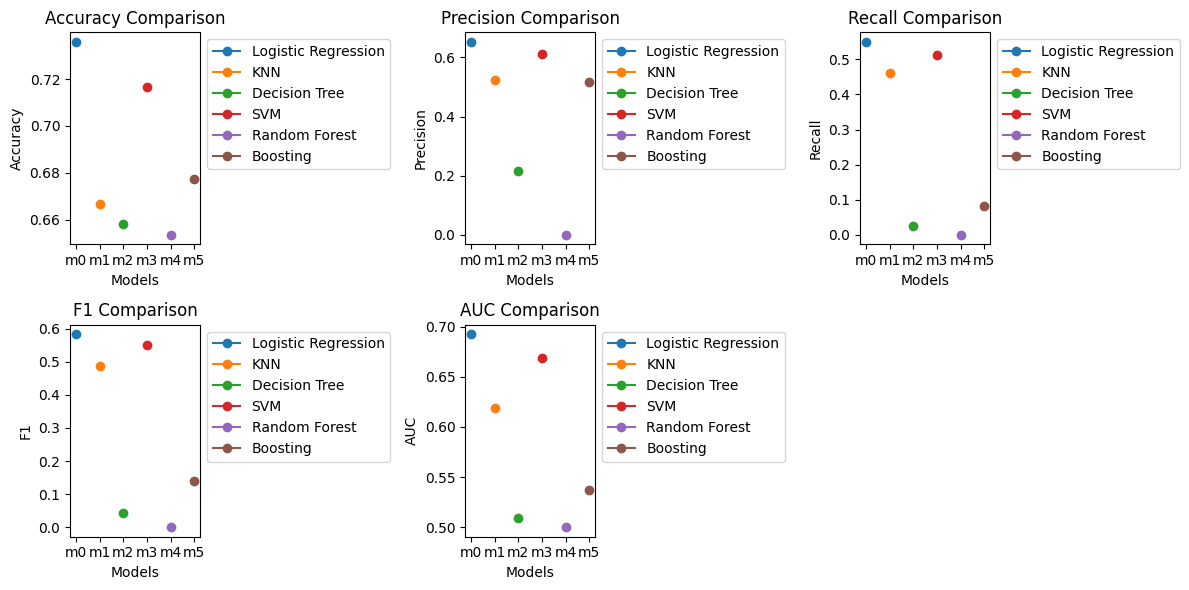

In [23]:
logistic_regression_custom = LogisticRegressionCustom()
knn_custom = KNearestNeighborCustom(k=3)
decision_tree_custom = DecisionTreeCustom(max_depth=3)
svm_custom = SVMCustom()
random_forest_custom = RandomForestCustom(max_depth=3)
boosting_custom = BoostingCustom(max_depth=3)

models = {
    'Logistic Regression': logistic_regression_custom,
    'KNN': knn_custom,
    'Decision Tree': decision_tree_custom,
    'SVM': svm_custom,
    'Random Forest': random_forest_custom,
    'Boosting': boosting_custom
}

metrics = {
    'Accuracy': accuracy_score,
    'Precision': precision_score,
    'Recall': recall_score,
    'F1': f1_score,
    'AUC': roc_auc_score
}

all_accuracy_scores = []
all_precision_scores = []
all_recall_scores = []
all_f1_scores = []
all_auc_scores = []

for model_name, model in models.items():
    print(f"Evaluating {model_name} on project_dataset2:")
    
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    auc_scores = []

    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    for train_index, test_index in skf.split(X2_scaled, y2):
        X_train, X_test = X2_scaled[train_index], X2_scaled[test_index]
        y_train, y_test = y2[train_index], y2[test_index] 

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy_scores.append(accuracy_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred))
        recall_scores.append(recall_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred))
        auc_scores.append(roc_auc_score(y_test, y_pred))

    print(f"  Average Accuracy on project_dataset2: {np.mean(accuracy_scores):.4f}")
    print(f"  Average Precision on project_dataset2: {np.mean(precision_scores):.4f}")
    print(f"  Average Recall on project_dataset2: {np.mean(recall_scores):.4f}")
    print(f"  Average F1 on project_dataset2: {np.mean(f1_scores):.4f}")
    print(f"  Average AUC on project_dataset2: {np.mean(auc_scores):.4f}")
    print()

    all_accuracy_scores.append(np.mean(accuracy_scores))
    all_precision_scores.append(np.mean(precision_scores))
    all_recall_scores.append(np.mean(recall_scores))
    all_f1_scores.append(np.mean(f1_scores))
    all_auc_scores.append(np.mean(auc_scores))

plt.figure(figsize=(12, 6))

models_names = list(models.keys())
metrics_names = list(metrics.keys())
metrics_values = [all_accuracy_scores, all_precision_scores, all_recall_scores, all_f1_scores, all_auc_scores]

for i, metric_values in enumerate(metrics_values):
    plt.subplot(2, 3, i+1)
    for j, model_name in enumerate(models_names):
        plt.plot('m' + str(j), metric_values[j], marker='o', label=model_name)

    plt.title(f'{metrics_names[i]} Comparison')
    plt.xlabel('Models')
    plt.ylabel(metrics_names[i])
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()
